In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp

Bernoulli = tfp.distributions.Bernoulli

In [5]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [12]:
class Bandit :
    def __init__ (self, p) :
        self.p = p
        self.p_estimate = 10
        self.N = 1
        self.bernoulli = Bernoulli(probs=self.p)
        
    def pull(self) :
        #draws a 1 with prob p
        #return np.random.random() < self.p
        return self.bernoulli.sample().numpy()
    
    def update(self, x) :
        self.N += 1
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N
        
def experiment() :
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS) :
        #use optimistic initial values to select the next bandit
        j = np.argmax([b.p_estimate for b in bandits])
        
        #pull the arm with the largest sample
        x = bandits[j].pull()
        
        #update the rewards log
        rewards[i] = x
        
        #update the distribution for the bandit
        bandits[j].update(x)
        
    for b in bandits:
        print(f'Mean estimate : {b.p_estimate}')
        
    print(f'Total reward : {rewards.sum()}')
    print(f'Overall win rate : {(rewards.sum() / NUM_TRIALS)}')
    print(f'num of times selected each bandit : {[b.N for b in bandits]}')
    
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.ylim([0, 1])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()

Mean estimate : 0.7142857142857143
Mean estimate : 0.7407407407407405
Mean estimate : 0.7484440875326249
Total reward : 7456.0
Overall win rate : 0.7456
num of times selected each bandit : [14, 27, 9962]


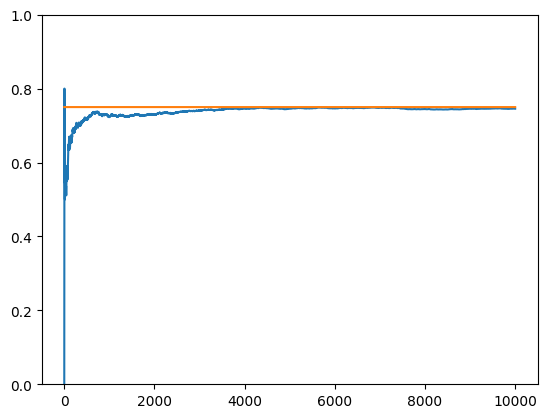

In [13]:
if __name__ == '__main__' :
    experiment()

## Output
The mean estimate for the first two bandits remain at ~ 0.7 and not converege since we are using a greedy algorithm which only chooses optimal bandit (0.75 here).